# De hoofdoorzaak van luchtvervuiling: transport versus industrie

Studenten: Melvin Dalhuisen 15261417, Ceylan Mas 15237974, Froukje Dijk 15262421 en Isa van de Hoef 14541912

Team: E1

In [1]:
# Load image from link
url = 'image1.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© iStock"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© iStock


## Introductie

Luchtvervuiling is een van de grootste milieuproblemen van onze tijd en heeft al decennialang de aandacht van wetenschappers, beleidsmakers en burgers. Hoewel luchtvervuiling in veel landen gereguleerd wordt door strenge milieuwetten, blijft het een hardnekkig probleem met verregaande gevolgen voor zowel het milieu als de volksgezondheid. Twee van de belangrijkste bronnen van luchtvervuiling zijn de industrie en het transport.

Vanuit het perspectief van de industrie speelt de productie van goederen een cruciale rol in de uitstoot van schadelijke stoffen zoals koolstofdioxide, zwaveldioxide en fijnstof. Deze vervuilende stoffen worden uitgestoten door fabrieken, energiecentrales en andere industriële installaties. Ze dragen bij aan smog, verzuring van ecosystemen en klimaatverandering.

Aan de andere kant veroorzaakt transport en verkeer een aanzienlijke hoeveelheid luchtvervuiling door de uitstoot van uitlaatgassen. Auto’s, vrachtwagens, bussen en andere vervoermiddelen zijn verantwoordelijk voor een groot deel van de stikstofoxiden en fijnstof in de atmosfeer.

## Dataset en Voorverwerking

Voor dit onderzoek hebben we gezocht naar datasets die informatie en gegevens bevatten over luchtvervuiling, transport, verkeer en industrie. Hieronder volgt een uitleg over de voorbewerking van de datasets.

De gebruikte datasets komen van verschillende bronnen. We hebben bij veel datasets verschillende stappen genomen om deze te kunnen gebruiken in onze data analyse. Denk hierbij aan het droppen van onnodige kolommen en het sorteren op alleen recente jaartallen.

Bij het samenvoegen van datasets waren de variabelenamen in sommige gevallen verschillend. Zo werd de variabele die de landen bevatte in de ene dataset aangeduid als 'Location' en in de andere dataset als 'Countries'. Om deze datasets te kunnen samenvoegen op basis van de landvariabele, hebben we ervoor gezorgd dat deze kolommen eerst dezelfde naam kregen.


# Variabele omschijvingen.

Hieronder staat een lijst met de gebruikte variabelen uit de datasets tijdens deze analyse:
- FactValueNumeric (Deze variabele bevat een numerieke waarde die de concentratie PM2.5 aangeeft.): Ratio, Continu
- Location (Deze variabele bevat landen van de wereld.): Nominaal, Discreet
- Industry_Value: Ratio, Continu
- total_export_2019: Ratio, Discreet
- total_import_2019: Ratio, Discreet
- Continent: Nominaal, Disceet
- Greenhouse gas emissions from industry: Ratio, Continu 
- Greenhouse gas emissions from transport: Ratio, Continu 
- CO2 Emission Index: Ratio, Continu
- Traffic Index: Ordinaal, Discreet
- Carbon dioxide emissions from transport: Ratio, Continu
- Year: Interval, Discreet


## Perspectief 1: Industrie is de hoofdoorzaak van luchtvervuiing 

Industrie speelt een cruciale rol in de economie van een land, maar het is ook een van de grootste bronnen van luchtvervuiling. Industriële activiteiten zoals productie en energieopwekking leiden tot de uitstoot van schadelijke stoffen zoals koolstofdioxide (CO2), zwavelstofdioxide (SO2), stikstofoxiden (NOx) en fijnstof. Deze stoffen veroorzaken ernstige milieuproblemen zoals klimaatverandering, verzuring en smog.

In veel landen, zoals China, heeft de snelle industriële groei geleid tot ernstige luchtvervuiling. Ondanks strenge emissienormen en maatregelen, zoals het sluiten van vervuilende fabrieken, blijft naleving en handhaving een uitdaging. Industriële faciliteiten bevinden zich vaak in stedelijke gebieden of nabij kwetsbare ecosystemen, waardoor de impact van luchtvervuiling nog groter is.

### Argument 1: Wereldwijde Luchtvervuiling Concentraties van PM2.5 per Land

De onderstaande afbeelding toont een wereldkaart waarop de luchtvervuiling per land is weergegeven. De intensiteit van de kleuren geeft de concentratie fijnstof (PM2.5) in de lucht aan. Hoe donkerder de kleur, hoe hoger de concentratie PM2.5. PM2.5 verwijst naar deeltjes met een diameter van minder dan 2,5 micrometer, die schadelijk kunnen zijn voor de gezondheid. Landen met donkerdere groene tinten hebben hogere niveaus van fijnstof en dus meer vervuilde lucht. De legenda aan de rechterkant van de kaart geeft de specifieke concentratiecategorieën aan, variërend van lage (lichtgroen) tot hoge (donkergroen) concentraties PM2.5.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Lees het CSV-bestand
data = pd.read_csv('data.csv')

# Verwijder de kolommen die niet boeien
columns_to_drop = [
    'IsLatestYear', 'ValueType', 'Indicator', 'Location type', 'Dim1 type', 
    'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3ValueCode', 
    'Dim3 type', 'Dim3', 'DataSourceDimValueCode', 'DataSource', 
    'FactValueNumericPrefix', 'FactValueUoM', 'FactValueNumericLowPrefix', 
    'FactValueNumericHighPrefix', 'FactValueTranslationID', 'FactComments', 
    'Language', 'DateModified', 'IndicatorCode', 'Period type'
]

data = data.drop(columns=columns_to_drop)

# Filter de data
data = data[(data['Period'] == 2019) & (data['Dim1'] == 'Total')]

# Maak een nieuwe kolom voor de groepen met stappen van 20
bins = list(range(0, 101, 20))
labels = [f'{i}-{i+19}' for i in bins[:-1]]
data['Group'] = pd.cut(data['FactValueNumeric'], bins=bins, labels=labels, right=False)

# Lees de wereldkaart shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge de data met de wereldkaart
world = world.merge(data, how='left', left_on='name', right_on='Location')

# Definieer een colormap met grotere kleurverschillen
cmap = mcolors.LinearSegmentedColormap.from_list('green_scale', ['#e0ffe0', '#006400'], N=len(labels))

# Plot de kaart
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Group', ax=ax, legend=True, cmap=cmap,
           missing_kwds={"color": "lightgrey"})

# Verwijder de x- en y-assen
ax.set_axis_off()

# Legenda toevoegen
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 0.5))
plt.title('PM2.5 concentratie per land')
plt.show()

KeyboardInterrupt: 

> *Figuur 1: Luchtvervuiling per land wereldwijd.*

### Argument 2: Relatie Tussen Industriële Activiteit en Fijnstofconcentraties (PM2.5) in de Lucht

De onderstaande lijngrafiek illustreert de relatie tussen de hoeveelheid industriële activiteit en de concentratie fijnstof (PM2.5) in de lucht. Op de x-as wordt de hoeveelheid industrie weergegeven, terwijl de y-as de hoeveelheid fijnstof aangeeft. De grafiek toontaan dat naarmate de industriële activiteit toeneemt, ook de hoeveelheid fijnstof in de lucht stijgt. Dit is vooral zichtbaar bij de punten rechtsboven in de grafiek, waar een hogere industriële aanwezigheid samenvalt met een significante toename van fijnstof.

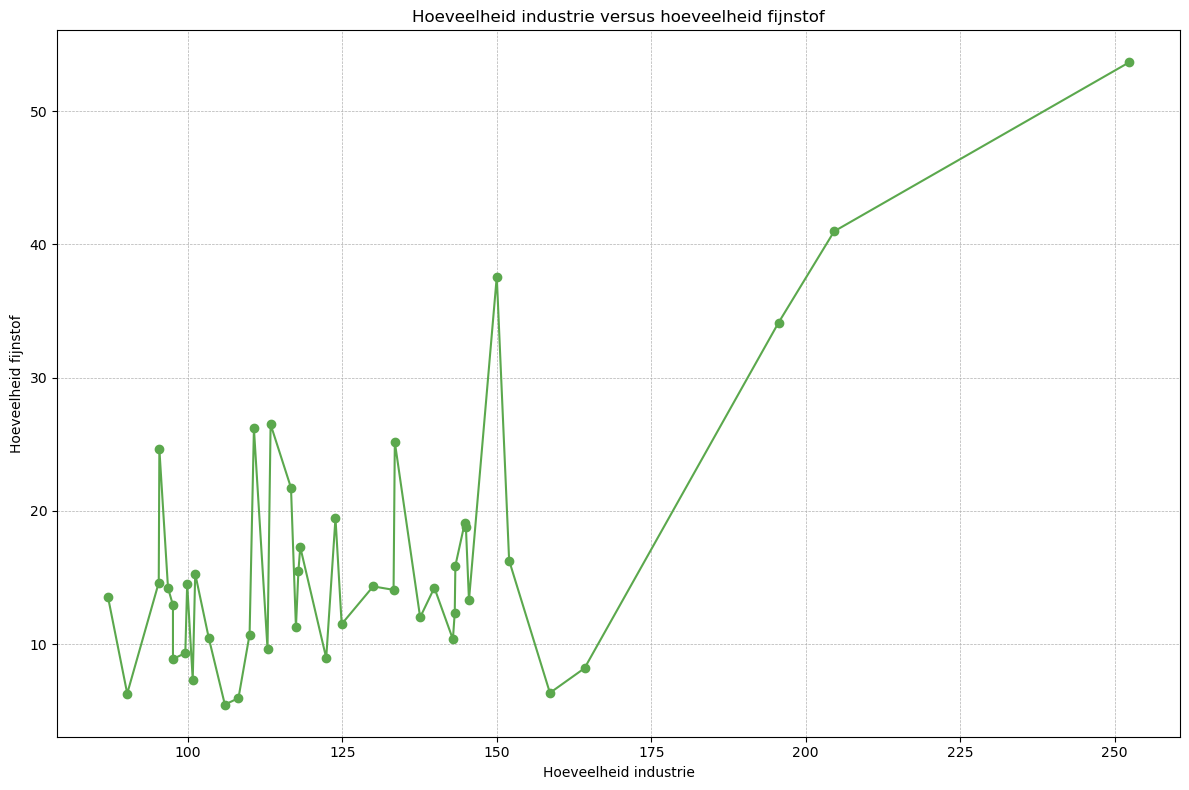

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lees de gegevens uit het CSV-bestand
df = pd.read_csv('merged_file.csv')

# Hernoem kolommen indien nodig
df.rename(columns={'Value_x': 'Value', 'Value_y': 'Industry_Value'}, inplace=True)

# Sorteer de DataFrame op Industry_Value
df = df.sort_values(by='Industry_Value')

# Plot de grafiek
plt.figure(figsize=(12, 8))
plt.plot(df['Industry_Value'], df['FactValueNumeric'], marker='o', linestyle='-', color='#528C5E')

# Labels en titel toevoegen
plt.xlabel('Hoeveelheid industrie')
plt.ylabel('Hoeveelheid fijnstof')
plt.title('Hoeveelheid industrie versus hoeveelheid fijnstof')

# Voeg een grid toe
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Toon de grafiek
plt.tight_layout()
plt.show()


> *Figuur 2: Lijngrafiek van de relatie tussen luchtvervuiling en industriële activiteit.*

De grafiek toont duidelijk aan dat een grotere hoeveelheid industriële activiteit gepaard gaat met een hogere concentratie fijnstof (PM2.5) in de lucht. Vooral bij extreme niveaus van industriële activiteit zien we een significante toename van fijnstof. Dit ondersteunt het argument dat de industrie een grote bijdrage levert aan luchtvervuiling. De correlatie tussen industriële activiteit en fijnstofconcentratie benadrukt de noodzaak voor strengere reguleringen en controlemechanismen om de uitstoot van schadelijke stoffen te beperken. Bovendien onderstreept het de rol van industriële sectoren in het aanpakken van milieuproblemen en de verantwoordelijkheid van bedrijven om schonere technologieën en duurzame praktijken te implementeren. Het is duidelijk dat zonder ingrijpende maatregelen, de industriële activiteiten een aanhoudende en ernstige impact zullen blijven hebben op de luchtkwaliteit en daarmee op de volksgezondheid en het milieu.

### Argument 3: Vergelijking van Export, Import en Luchtvervuiling per Continent 

De onderstaande grafiek toont de totale export- en importwaarden per continent voor 2019, samen met de gemiddelde luchtverontreinigingswaarden. Azië heeft de hoogste waarden voor zowel export als import, en ook de hoogste niveaus van luchtvervuiling. Europa en Noord-Amerika hebben hoge handelsactiviteiten en gematigde niveaus van luchtvervuiling. Afrika, Oceanië en Zuid-Amerika laten zowel lagere handelsactiviteiten als lagere niveaus van luchtvervuiling zien. De grafiek presenteert de verschillen in handelsactiviteiten en luchtvervuilingsniveaus tussen de continenten.

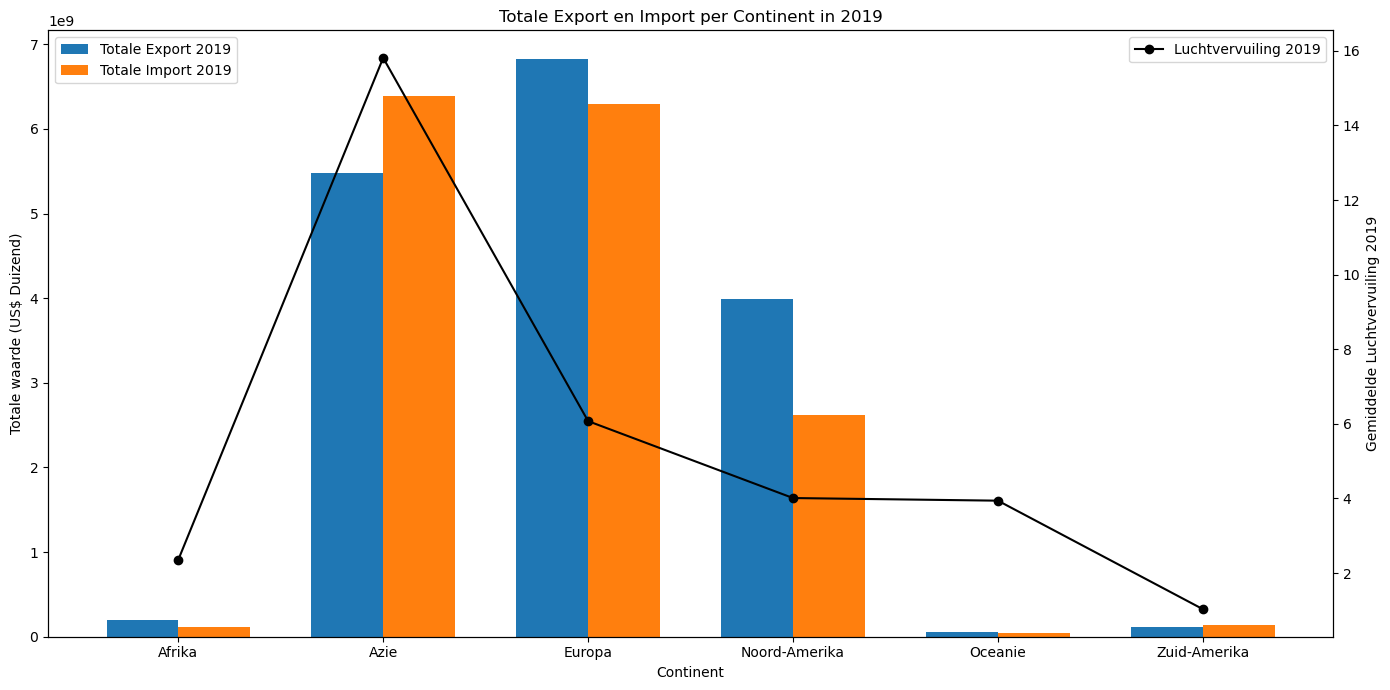

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de import/export dataset
file_path_trade = '34_years_world_export_import_dataset.csv'
data_trade = pd.read_csv(file_path_trade)

# Filter de dataset voor het jaar 2019
data_trade_2019 = data_trade[data_trade['Year'] == 2019]

# Bereken de totale import en export per land in 2019
total_summary_2019 = data_trade_2019.groupby('Partner Name').agg(
    total_export_2019=('Export (US$ Thousand)', 'sum'),
    total_import_2019=('Import (US$ Thousand)', 'sum')
).reset_index()

# Laad de luchtverontreiniging dataset
file_path_pollution = 'air_pollution new.csv'
data_pollution = pd.read_csv(file_path_pollution)

# Kolomnamen opschonen en de '2019' kolom naar numeriek converteren
data_pollution.columns = data_pollution.columns.str.replace('"', '').str.strip()
data_pollution['2019'] = pd.to_numeric(data_pollution['2019'], errors='coerce')

# Continent mapping
continent_data_updated = {
    'Afrika': ['Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Chad', 'Comoros', 'Congo', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Togo', 'Zambia', 'Zimbabwe'],
    'Azie': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europa': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],
    'Noord-Amerika': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceanie': ['Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'Zuid-Amerika': ['Argentina', 'Bolivia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Uruguay', 'Venezuela']
}

# Create a mapping from country to continent
country_to_continent_updated = {country: continent for continent, countries in continent_data_updated.items() for country in countries}

# Voeg de continent informatie toe aan de import/export dataset
total_summary_2019['Continent'] = total_summary_2019['Partner Name'].map(country_to_continent_updated)

# Bereken de totale import en export per continent in 2019
continent_summary_2019 = total_summary_2019.groupby('Continent').agg(
    total_export_2019=('total_export_2019', 'sum'),
    total_import_2019=('total_import_2019', 'sum')
).reset_index()

# Voeg de continent informatie toe aan de luchtverontreiniging dataset
data_pollution['Continent'] = data_pollution['country'].map(country_to_continent_updated)

# Bereken de gemiddelde luchtverontreiniging per continent voor 2019
average_2019_per_continent = data_pollution.groupby('Continent')['2019'].mean().reset_index()

# Merge de luchtverontreiniging gegevens met de handel gegevens
data_merged = continent_summary_2019.merge(average_2019_per_continent, on='Continent')

# Plot de resultaten
fig, ax1 = plt.subplots(figsize=(14, 7))

bar_width = 0.35
index = range(len(data_merged))

# Updated bar color for total export 2019
bar1 = ax1.bar(index, data_merged['total_export_2019'], bar_width, label='Totale Export 2019', color='orange')
bar2 = ax1.bar([i + bar_width for i in index], data_merged['total_import_2019'], bar_width, label='Totale Import 2019', color='#7FBFCE')

ax1.set_xlabel('Continent')
ax1.set_ylabel('Totale waarde (US$ Duizend)')
ax1.set_title('Totale Export en Import per Continent in 2019')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(data_merged['Continent'])
ax1.legend(loc='upper left')

# Secondary axis for air pollution
ax2 = ax1.twinx()
ax2.plot([i + bar_width / 2 for i in index], data_merged['2019'], color='black', marker='o', label='Luchtvervuiling 2019')
ax2.set_ylabel('Gemiddelde Luchtvervuiling 2019')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> *Figuur 3: Totale export en import vergeleken met de gemiddelde luchtvervuiling per continent.*


Hoewel China aanzienlijke inspanningen levert om zijn koolstofintensiteit te verminderen en het aandeel hernieuwbare energie te vergroten, zijn deze doelen mogelijk niet ambitieus genoeg om aan de internationale normen, zoals het Parijsakkoord, te voldoen (“China’s Achievements, New Goals And New Measures For Nationally Determined Contributions”, 2021). Dit komt duidelijk naar voren in de grafiek, waar Azië, met China als grote speler, de hoogste luchtvervuiling heeft. Dit staat in contrast met Europa en Noord-Amerika, waar strengere milieuregels en een meer geavanceerde implementatie van groene technologieën hebben geleid tot lagere niveaus van luchtvervuilin (Liu et al., 2022). 

De grafiek illustreert dat ondanks de economische groei en hoge export- en importwaarden in Azië, dit gepaard gaat met aanzienlijke milieukosten. Dit versterkt de noodzaak voor strengere en effectievere milieumaatregelen om de luchtkwaliteit te verbeteren en de CO2-uitstoot te verminderen.

De huidige inspanningen van China zijn belangrijk, maar er is meer nodig om de milieu-impact te verminderen. Striktere reguleringen en een snellere transitie naar hernieuwbare energiebronnen zijn cruciaal om de luchtvervuiling en CO2-uitstoot in lijn te brengen met wereldwijde normen. De grafiek onderstreept deze noodzaak door de huidige hoge luchtvervuilingsniveaus in Azië te tonen in vergelijking met andere continenten.

## Perspectief 2: Transport is de hoofdoorzaak van luchtvervuiling

Luchtvervuiling is een ingewikkeld probleem met veel oorzaken, waarbij zowel de industrie als het verkeer een belangrijke rol spelen. Auto's, vrachtwagens en bussen zijn voorbeelden van voertuigen die aanzienlijke hoeveelheden schadelijke stoffen uitstoten, waaronder fijnstof, koolstofmonoxide (CO) en stikstofoxiden (NOx). Deze emissies veroorzaken smog en klimaatverandering, vooral in stedelijke gebieden met veel verkeer.

Transport is een van de belangrijkste oorzaken van luchtvervuiling in veel landen. De uitbreiding van steden en de toename van het aantal voertuigen hebben geleid tot een toename van de luchtvervuiling. Stadscentra en drukke verkeersknooppunten worden vaak geconfronteerd met hoge niveaus van luchtvervuiling, wat leidt tot slechte zichtbaarheid en luchtkwaliteit.



### Argument 1: Totale Broeikasgasuitstoot per Sector (2018-2024). Vergelijking Tussen Industrie en Transport

De grafiek hieronder toont de totale uitstoot van broeikasgassen voor de sectoren industrie en transport, gesommeerd over de jaren 2018 tot en met 2024. De balken geven de totale uitstoot voor elk van deze sectoren weer, waarbij de landen met de hoogste uitstoot in deze periode worden benadrukt.

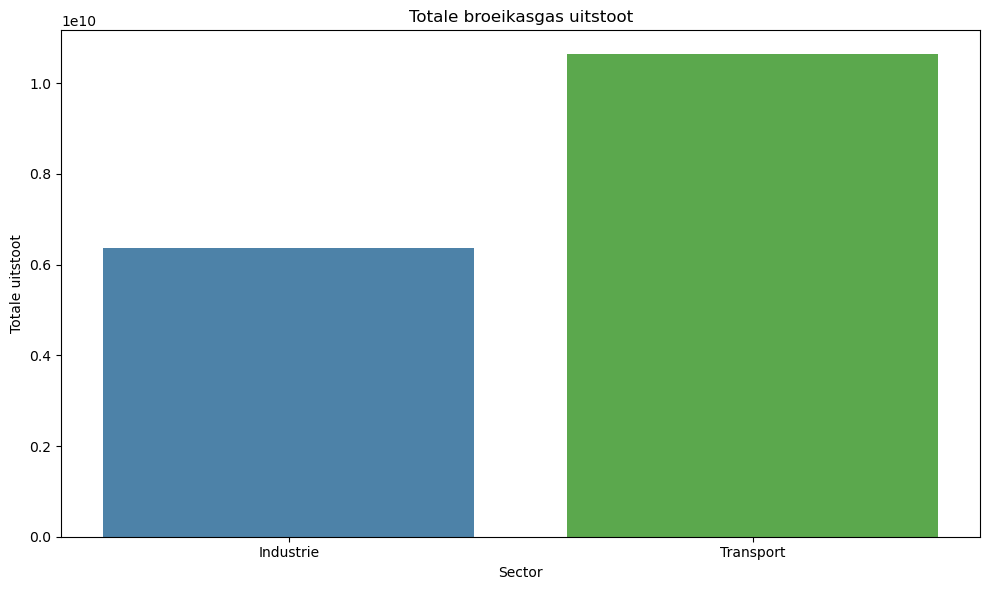

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad het CSV-bestand
ghg_emissions_df = pd.read_csv('ghg-emissions-by-sector.csv')

# Filter de dataset voor de jaren 2018 tot 2024 en sluit 'World' uit
filtered_ghg_emissions_df = ghg_emissions_df[
    (ghg_emissions_df['Year'] >= 2018) & 
    (ghg_emissions_df['Year'] <= 2024) &
    (ghg_emissions_df['Entity'] != 'World')  # Sluit 'World' of andere aggregaten uit
]

# Selecteer de totalen van emissies voor de geselecteerde sectoren (industrie en transport) voor de gefilterde jaren
selected_sectors_comparison = [
    "Greenhouse gas emissions from industry",
    "Greenhouse gas emissions from transport"
]

filtered_country_sector_emissions = filtered_ghg_emissions_df.groupby('Entity')[selected_sectors_comparison].sum()

# Identificeer het top land voor elke sector in de gefilterde data
filtered_top_country_industry = filtered_country_sector_emissions["Greenhouse gas emissions from industry"].idxmax()
filtered_top_emission_industry = filtered_country_sector_emissions.loc[filtered_top_country_industry, "Greenhouse gas emissions from industry"]

filtered_top_country_transport = filtered_country_sector_emissions["Greenhouse gas emissions from transport"].idxmax()
filtered_top_emission_transport = filtered_country_sector_emissions.loc[filtered_top_country_transport, "Greenhouse gas emissions from transport"]

# Maak een DataFrame voor de top landen in de gefilterde data
filtered_top_countries_emissions = pd.DataFrame({
    'Sector': ['Industrie', 'Transport'],
    'Country': [filtered_top_country_industry, filtered_top_country_transport],
    'Total Emissions': [filtered_top_emission_industry, filtered_top_emission_transport]
})

# Maak het balkendiagram voor de geselecteerde sectoren met top landen benadrukt in de gefilterde data
plt.figure(figsize=(10, 6))
plt.bar(filtered_top_countries_emissions['Sector'], filtered_top_countries_emissions['Total Emissions'], color=['#4d82a8', '#5ba84d'])
plt.title('Totale broeikasgas uitstoot')
plt.xlabel('Sector')
plt.ylabel('Totale uitstoot')
plt.tight_layout()

# Toon het plot
plt.show()


> *Figuur 4: Totale uitstoot van broeikasgassen voor de sectoren industrie en transport.*

De bovenstaande staafdiagram vergelijkt de totale uitstoot van broeikasgassen door de industrie- en transportsectoren. Uit de vergelijking blijkt dat de transportsector een hogere totale uitstoot heeft vergeleken met de industriesector, wat aangeeft dat transport een significantere impact heeft op luchtvervuiling. Hoewel de industrie nog steeds een substantiële bijdrage levert aan de uitstoot van broeikasgassen, is de totale uitstoot van de industrie lager dan die van de transportsector.

Deze vergelijking benadrukt de grotere invloed van de transportsector op luchtvervuiling. Dit suggereert dat inspanningen om de uitstoot van broeikasgassen te verminderen bijzonder effectief kunnen zijn als ze gericht zijn op het verminderen van uitstoot door transport. Mogelijke strategieën hiervoor zijn het verbeteren van de brandstofefficiëntie, het promoten van elektrische voertuigen en het verbeteren van openbare transportsystemen.

### Argument 2: Relatie Tussen Verkeersvolume en CO2-uitstoot. 

In de onderstaande grafiek zie je de hoeveelheid verkeer (de Traffic Index) uitgezet tegenover de hoeveelheid CO2 (CO2 Emission Index). De grafiek bevat de data van 84 landen, wat betekend dat elk punt in de plot een land is waarvan je op de y-as de hoeveelheid verkeer kunt zien, en op de x-as de CO2 uitstoot hiervan.

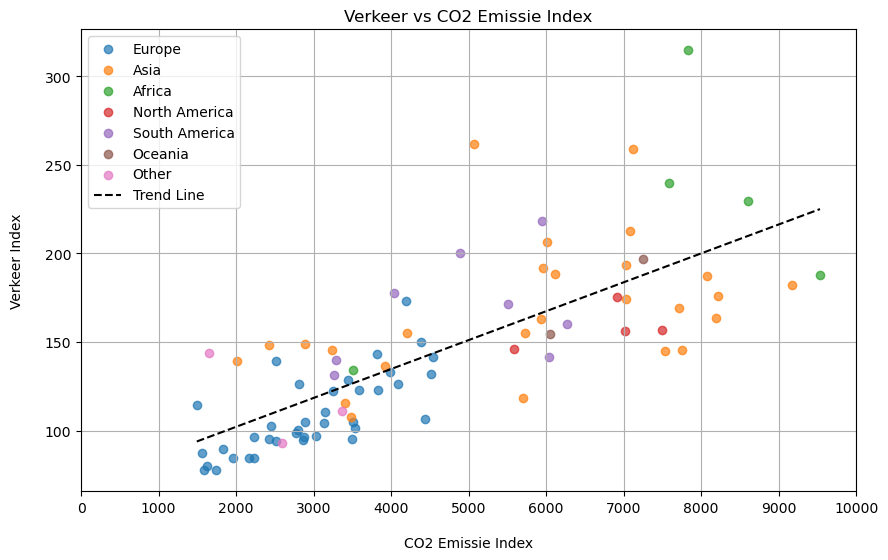

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('Adjusted_TransportCO2.csv')

# Manually mapping countries to continents
continent_map = {
    "Europe": ["Albania", "Armenia", "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
               "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", 
               "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Moldova", "Netherlands", 
               "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "Serbia", "Slovakia", 
               "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"],
    "Asia": ["Armenia", "Georgia", "Russia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", 
             "Cambodia", "China", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
             "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", 
             "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", 
             "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", 
             "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", 
               "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
               "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", 
               "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", 
               "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", 
               "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", 
               "Tunisia", "Uganda", "Zambia", "Zimbabwe"],
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", 
                      "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", 
                      "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", 
                      "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", 
                      "Peru", "Suriname", "Uruguay", "Venezuela"],
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", 
                "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

# Create a function to map countries to continents
def get_continent(country):
    for continent, countries in continent_map.items():
        if country in countries:
            return continent
    return "Other"

# Apply the function to create a new column
df['Continent'] = df['Country'].apply(get_continent)

# Sort the dataframe by CO2 Emission Index
sorted_df = df.sort_values(by='CO2 Emission Index')

# Define colors for each continent
colors = {
    "Europe": "#1f77b4",
    "Asia": "#ff7f0e",
    "Africa": "#2ca02c",
    "North America": "#d62728",
    "South America": "#9467bd",
    "Oceania": "#8c564b",
    "Other": "#e377c2"
}

# Create a scatter plot with colors based on the continent
plt.figure(figsize=(10, 6))

# Plot each continent with its respective color
for continent, color in colors.items():
    subset = sorted_df[sorted_df['Continent'] == continent]
    plt.scatter(subset['CO2 Emission Index'], subset['Traffic Index'], color=color, label=continent, alpha=0.7)

# Fit a linear trend line
z = np.polyfit(sorted_df['CO2 Emission Index'], sorted_df['Traffic Index'], 1)
p = np.poly1d(z)
plt.plot(sorted_df['CO2 Emission Index'], p(sorted_df['CO2 Emission Index']), "k--", label="Trend Line")

# Set the labels and title
plt.xlabel('CO2 Emissie Index', labelpad=15)
plt.ylabel('Verkeer Index', labelpad=15)
plt.title('Verkeer vs CO2 Emissie Index')

# Customize the x-axis labels and ensure it starts at 0
plt.xticks(ticks=range(0, int(sorted_df['CO2 Emission Index'].max()) + 1000, 1000))
plt.xlim(left=0)  # Ensure the x-axis starts at 0

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


> *Figuur 5: Hoeveelheid verkeer versus de CO2 uitstoot.*

Uit de grafiek blijkt een positieve correlatie tussen de CO2 Emissie Index en de Verkeer Index, wat aangeeft dat landen met hogere verkeersvolumes doorgaans ook hogere CO2-uitstoot hebben. De zwarte trendlijn laat een opwaartse trend zien, wat bevestigt dat naarmate de verkeersintensiteit toeneemt, de CO2-uitstoot stijgt. Deze bevindingen benadrukken dat maatregelen gericht op het verminderen van verkeer waarschijnlijk een positieve impact zullen hebben op het verlagen van de CO2-uitstoot.

Bovendien spreekt deze grafiek die het perspectief van de transport en verkeer ondersteund, figuur 3 die het perspectief van de industrie ondersteund, enorm tegen. In figuur 5 is namenlijk te zien dat Europa een vrij lage CO2 Emissie Index heeft als je dit vergelijkt met de andere werelddelen. Als je echter kijkt naar Europa in figuur 3 dan zie je daar dat Europa een veel hogere luchtvervuiling heeft dan veel andere werelddelen. Deze bevinding laat het verschil in beide perspectieven goed zien.

### Argument 3: Jaarlijkse Stijging van Gemiddelde CO2-uitstoot door Transport Wereldwijd

De grafiek toont de gemiddelde CO2-emissies van de transportsector wereldwijd van 1990 tot 2019. Op de horizontale as staan de jaren, en op de verticale as de gemiddelde CO2-emissies in tonnen.

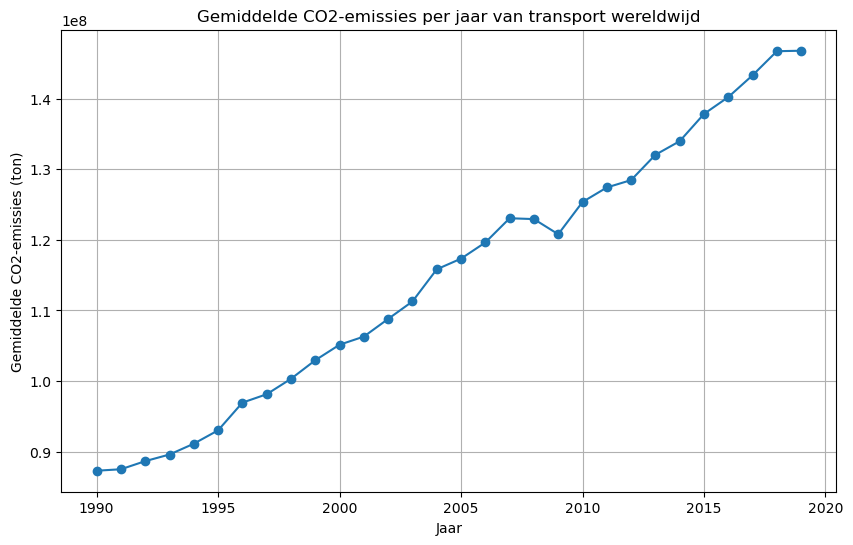

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('co2-emissions-transport.csv')

import matplotlib.pyplot as plt

# Remove the 'Code' column
data = data.drop(columns=['Code'])

# Group by 'Year' and calculate the mean of 'Carbon dioxide emissions from transport', ignoring NaNs
yearly_avg_emissions = data.groupby('Year')['Carbon dioxide emissions from transport'].mean()

# Reset the index for plotting
yearly_avg_emissions = yearly_avg_emissions.reset_index()

# Filter out the year 2020
yearly_avg_emissions_filtered = yearly_avg_emissions[yearly_avg_emissions['Year'] < 2020]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_emissions_filtered['Year'], yearly_avg_emissions_filtered['Carbon dioxide emissions from transport'], marker='o')
plt.title('Gemiddelde CO2-emissies per jaar van transport wereldwijd')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde CO2-emissies (ton)')
plt.grid(True)
plt.show()



> Figuur 6: De gemiddelde CO2-emissie wereldwijd.

Uit de grafiek blijkt dat de gemiddelde CO2-emissies door de transportsector wereldwijd van 1990 tot 2019 duidelijk zijn gestegen. Dit wijst op een aanzienlijke toename van de uitstoot in de loop van de tijd. De uitstoot in de recentere jaren (vanaf 2000) is hoger dan in de jaren 90, wat suggereert dat de transportsector een steeds grotere bijdrage levert aan de wereldwijde CO2-uitstoot. Hoewel er jaarlijkse fluctuaties zijn, blijft de algemene trend stijgend. Dit benadrukt de noodzaak van gerichte maatregelen om de CO2-uitstoot in de transportsector te verminderen en de klimaatverandering tegen te gaan.

## Reflectie

In het begin ondervonden we enige uitdagingen bij het vinden van een geschikte dataset. We vonden de opdracht in het begin een beetje lastig en we vonden het moeilijk om twee verschillende perspectieven over een onderwerp te identificeren. Deze uitdagingen leidden tot een langzamer startproces. 

Toen we uiteindelijk een relevant onderwerp hadden gevonden, ging het toch wel heel snel. We waren in staat om direct een efficiënte taakverdeling op te stellen, waardoor het werktempo flink toenam. De samenwerking verliep soepel en de werkzaamheden werden effectief verdeeld.

Op 25 juni 2024 verzamelde ons team zich met twee andere groepjes voor peer feedback, waarbij elke groep om de beurt het werk van de afgelopen 3 weken presenteerde. Na de pitch gaven de andere twee groepen feedback over wat goed was gedaan en wat verbeterd kon worden.

De belangrijkste complimenten die we ontvingen voor de versie die we toen hadden, waren dat ons dataverhaal er erg goed uitzag en ook dat onze grafieken er goed uitzagen wat het een strakke uitstraling gaf. De verschillende soorten grafieken maakten het dataverhaal interessant om naar te kijken.

Hieronder staan een aantal onderdedlen die in de feedbackronde zijn benoemd door onze klasgenoten evenals de TAs:

- Voor onze scatterplot kregen we het advies om kleuren te gebruiken om de verschillende werelddelen in de grafiek aan te geven, zodat de grafiek visueel aantrekkelijker wordt.
- Er was een vraag over hoe de regulering van transport binnen een land invloed heeft op de luchtvervuiling, wat suggereerde dat we dit aspect verder in onze analyse zouden onderzoeken.
- De lijn in de grafiek over de totale export en import was in eerste instantie rood. De feedback hierop was dat de lijn niet duidelijk genoeg was door de kleurencombinatie, deze lijn is nu veranderd van kleur om de lijn duidelijker te maken.

Later hebben we als team afgesproken dat dit allemaal gepaste feedback was om aan te werken. Direct na de feedbackdag hebben we de suggesties geïmplementeerd, waarbij we kleuren aan onze scatterplot hebben toegevoegd om continenten te onderscheiden en het effect van transportreguleringen op luchtvervuiling hebben onderzocht.

## Werkverdeling

De samenwerking tijdens ons project verliep heel goed. We hielden regelmatig contact via WhatsApp en ook tijdens de werkgroepen. Tijdens de allereerste les pitchten we allemaal onze ideeën en stuurden we verschillende datasets naar elkaar op die ons interessant leken. Zo zijn we uiteindelijk tot een conclusie gekomen en hadden we besloten om het over luchtvervuiling te doen omdat dat een heel actueel onderwerp is. Daarna zijn we los van elkaar verschillende datasets gaan opzoeken en die samenvoegen. Vervolgens gingen we kijken op welke manier we deze data konden visualiseren. We stemden dit een beetje met elkaar af zodat we niet allemaal dezelfde soort grafieken hadden. Na de feedback zijn we vooral bezig geweest met de feedback verwerken en het aanpassen van onze grafieken.

#### Melvin:
Melvin was verantwoordelijk voor het samenvoegen van datasets en hield zich vooral bezig met het maken van de grafieken. Hij zorgde ook voor de volgorde van de grafieken en of ze goed aansloten op de verschillende perspectieven.

#### Ceylan:
Ceylan werkte veel aan de proposal van het onderzoek en zorgde ervoor dat alles netjes in GitHub kwam te staan. Hij hield zich ook bezig met het maken van grafieken.

#### Froukje:
Froukje las het document na om ervoor te zorgen dat alles correct was en maakte ook een grafiek. Ook zorgde ze ervoor dat de referentielijst correct was. 

#### Isa:
Isa zorgde voor het tijdmanagement, dus ervoor zorgen dat we met z'n allen aan de opdracht zouden werken en op tijd klaar zouden zijn. Daarnaast hield ze zich bezig met de tekst binnen het document, zoals het controleren of alle conclusies en de inleiding klopten.

## Referenties

China’s Achievements, New Goals and New Measures for Nationally Determined Contributions. (2021). In China’s Achievements, New Goals And New Measures For Nationally Determined Contributions [Report]. https://unfccc.int/sites/default/files/NDC/2022-06/China%E2%80%99s%20Achievements%2C%20New%20Goals%20and%20New%20Measures%20for%20Nationally%20Determined%20Contributions.pdf

Global Air Pollution Dataset. (2022, 8 november). Kaggle. https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

Industrial Production by Indicator, Country and Year-United Nations Economic Commission for Europe. (z.d.). United Nations Economic Commission For Europe. https://w3.unece.org/PXWeb2015/pxweb/en/STAT/STAT__20-ME__5-MEPW/0_en_MECCIndProdY_r.px/

Liu, C., Xin, L., & Li, J. (2022). Environmental regulation and manufacturing carbon emissions in China: a new perspective on local government competition. Environmental Science And Pollution Research International, 29(24), 36351–36375. https://doi.org/10.1007/s11356-021-18041-w

Ritchie, H., Rosado, P., & Roser, M. (2024, January 5). Breakdown of carbon dioxide, methane and nitrous oxide emissions by sector. Our World in Data. https://ourworldindata.org/emissions-by-sector

Traffic Index by Country 2024. (z.d.). https://www.numbeo.com/traffic/rankings_by_country.jsp

UNdata. (z.d.). http://data.un.org/Default.aspx

World Export & Import Dataset (1989 - 2023). (2023, 9 september). Kaggle. https://www.kaggle.com/datasets/muhammadtalhaawan/world-export-and-import-dataset
